# RNN으로 삼각함수 예측하기




* pyforest 참고 - https://hyeonchan523.github.io/python/pyforest/

In [ ]:
!pip install pyforest

  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14606 sha256=abe096a91a0f7c78e0c83b11c72aa9a9c1234f8c3012ead4a22ad389aac734be
  Stored in directory: /root/.cache/pip/wheels/61/1c/da/48e6c884142d485475d852d69d20a096aba5beceb338822893
Successfully built pyforest


In [ ]:
import pyforest

In [ ]:
all_libs = dir(pyforest) # import 된 모든 라이브러리를 반환
active_libs = pyforest.active_imports() # import 되었지만 사용되지 않은 라이브러리 리스트 반환
laze_libs = pyforest.lazy_imports() # import되고, 사용중인 라이브러리의 리스트 반환

In [ ]:
print('==================')
print('Active libs \n',len(active_libs))
print('==================')
print('Laze libs \n',len(laze_libs))
print('==================')

Active libs 
 0
Laze libs 
 79


# 데이터 생성

## sin 함수로 데이터 생성

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

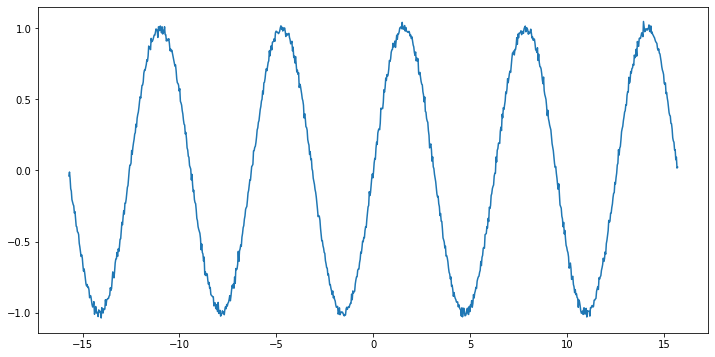

In [ ]:
sin_x = np.linspace(-5*np.pi, 5*np.pi, 1000) # -2pi ~ 2pi 범위의 X값 생성
sin_y = np.sin(sin_x) # np.sin 함수로 Y값 생성

# sin 함수에 무작위로 노이즈 생성
# weights = 0.02
# sin_y = np.sin(sin_x) + weights*np.random.randn(len(sin_x))

# 생성한 데이터 시각화
plt.figure(figsize=(12,6))
plt.plot(sin_x, sin_y)
plt.show()

# 데이터 전처리

In [ ]:
n_time = 10 # 시점 수
n_in = 1 # 입력층 뉴런 수
n_mid = 20 # 은닉층 뉴런 수
n_out = 1 # 출력층 뉴런 수

In [ ]:
n_sample = len(sin_x) - n_time
input_data = np.zeros((n_sample, n_time, n_in))
correct_data = np.zeros((n_sample, n_out))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
for i in range(0, n_sample):
    input_data[i] = sin_y[i:i+n_time].reshape(-1, 1)
    correct_data[i] = sin_y[i+n_time:i+n_time+1]

In [ ]:
print(input_data[0].shape)
print(input_data[0], correct_data[0])

(10, 1)
[[-0.03840479]
 [-0.01142733]
 [-0.05769939]
 [-0.12870664]
 [-0.14515944]
 [-0.20502281]
 [-0.22188022]
 [-0.23850513]
 [-0.24890758]
 [-0.29883524]] [-0.2891193]


In [ ]:
X = input_data
y = correct_data

In [ ]:
# from sklearn.model_selection import train_test_split

# train:test - 8:2 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# train:val - 8:2 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(8, activation='relu', input_shape=(10,1)))
model.add(Dense(1))

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mse']
)

model.summary()

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=2)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 8)                 80        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
20/20 - 1s - loss: 0.8726 - mse: 0.8726 - val_loss: 0.4978 - val_mse: 0.4978
Epoch 2/20
20/20 - 0s - loss: 0.3790 - mse: 0.3790 - val_loss: 0.2916 - val_mse: 0.2916
Epoch 3/20
20/20 - 0s - loss: 0.2661 - mse: 0.2661 - val_loss: 0.2289 - val_mse: 0.2289
Epoch 4/20
20/20 - 0s - loss: 0.2116 - mse: 0.2116 - val_loss: 0.1853 - val_mse: 0.1853
Epoch 5/20
20/20 - 0s - loss: 0.1670 - mse: 0.1670 - val_loss: 0.1461 - val_mse: 0.1461
Epoch 6/20
20/20 - 0s - loss: 0.1269 - mse: 0.1269 - val_loss: 0.1095 - val_mse:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

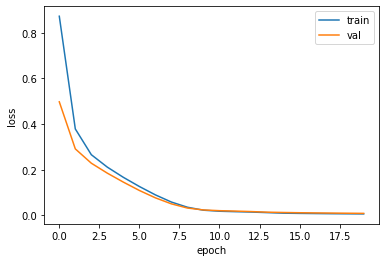

In [ ]:
# import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'])
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

print(f"Train RMSE: {train_rmse.round(4)}")
print(f"Test RMSE: {test_rmse.round(4)}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train RMSE: 0.0812
Test RMSE: 0.0856


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
# train data
# fig.add_trace(go.Scatter(x=sin_x, y=sin_y,
#                     mode='lines',
#                     name='real'))
# test data
fig.add_trace(go.Scatter(x=sin_x, y=y_test.ravel(),
                    mode='lines',
                    name='real_pred'))
# test_pred data
fig.add_trace(go.Scatter(x=sin_x, y=test_pred.ravel(),
                    line=dict(dash='solid', width=3),
                    name='pred'))

fig.update_layout(
    title="RNN 사인 함수",
    height=500)
fig.show()

# 학습 과정 시각화

In [ ]:
def predict_viz(model, epoch):
    test_pred = model.predict(X_test)
    model_name = model.layers[0].name.upper()

    fig = go.Figure()
    # test data
    fig.add_trace(go.Scatter(x=sin_x, y=y_test.ravel(),
                        mode='lines',
                        name='real_pred'))
    # test_pred data
    fig.add_trace(go.Scatter(x=sin_x, y=test_pred.ravel(),
                        line=dict(dash='solid', width=3),
                        name='pred'))

    fig.update_layout(
        title=f"epoch {epoch} - {model_name} 사인 함수",
        height=500)
    fig.show()

## RNN

In [ ]:
epochs = 5

In [ ]:
tf.random.set_seed(1234)

model = Sequential()
model.add(SimpleRNN(8, activation='relu', input_shape=(10,1)))
model.add(Dense(1))

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mse']
)

for i in range(1, epochs+1):
    model.fit(X_train, y_train, epochs=1, validation_data=(X_val, y_val), verbose=False)
    predict_viz(model, i)

## LSTM

In [ ]:
tf.random.set_seed(1234)

model = Sequential()
model.add(LSTM(8, activation='relu', input_shape=(10,1)))
model.add(Dense(1))

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mse']
)

for i in range(1, epochs+1):
    model.fit(X_train, y_train, epochs=1, validation_data=(X_val, y_val), verbose=False)
    predict_viz(model, i)

## GRU

In [ ]:
tf.random.set_seed(1234)

model = Sequential()
model.add(GRU(8, activation='relu', input_shape=(10,1)))
model.add(Dense(1))

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mse']
)

for i in range(1, epochs+1):
    model.fit(X_train, y_train, epochs=1, validation_data=(X_val, y_val), verbose=False)
    predict_viz(model, i)